### columns info
 - ACADEMIC_STAT_CODE : 중도탈락 여부
 - ADMISSION : 입학 전형
 - AGE : 나이
 - ATTENDANCE : 출석률
 - DOUBLE_MAJOR : 복수전공 여부
 - GRADE : 평균학점
 - INCOME_QUINTILE: 소득분위(5분위)
 - OCCP_GRP_1 : 학과 계열
 - PREPARE_ATTENDANCE : 동일 나이 대비 출석률
 - PREPARE_GRADE : 동일 나이 대비 평균학점
 - PREPARE_join_1years_ago	PREPARE_join_2years_ago	PREPARE_join_3years_ago	PREPARE_join_4years_ago	PREPARE_join_this_year 
   : 동일나이 대비 년도별 교내 프로그램 참가 횟수
 - STUDENT_ID : 학생 고유 번호
 - TOTAL_JOIN : 교내프로그램 총 참가 횟수
 - TOTAL_OFF : 총 휴학 횟수
 - UNI_DIST : 거주지와 대학간의 거리
 - join_1years_ago join_2years_ago join_3years_ago join_4years_ago join_this_year
   : 년도별 교내프로그램 참가 횟수
 - off_1years_ago	off_2years_ago	off_3years_ago	off_4years_ago	off_this_year
   : 년도별 휴학 여부

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def str_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) == 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col


def int_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) != 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col 

def p_100(a, b):
    print( round( (a/(a+b))*100,2), "%" )
    
def extraction_func(df, col_name, num_list):
    temp = pd.DataFrame()
    for i in num_list:
        temp = pd.concat([ temp, df.loc[df[col_name] == i ] ],axis=0)
    return temp    

In [3]:
student_df = pd.read_csv('./temp_data/student_drop_out.csv',encoding='utf-8')
print(student_df.shape)
print(student_df.dtypes)
print(student_df.isnull().sum())
student_df.tail(5)

(20606, 29)
ACADEMIC_STAT_CODE          object
ADMISSION                   object
AGE                          int64
ATTENDANCE                 float64
DOUBLE_MAJOR                object
GRADE                      float64
INCOME_QUINTILE            float64
OCCP_GRP_1                  object
PREPARE_ATTENDANCE         float64
PREPARE_GRADE              float64
PREPARE_join_1years_ago    float64
PREPARE_join_2years_ago    float64
PREPARE_join_3years_ago    float64
PREPARE_join_4years_ago    float64
PREPARE_join_this_year     float64
STUDENT_ID                   int64
TOTAL_JOIN                 float64
TOTAL_OFF                    int64
UNI_DIST                   float64
join_1years_ago            float64
join_2years_ago            float64
join_3years_ago            float64
join_4years_ago            float64
join_this_year             float64
off_1years_ago              object
off_2years_ago              object
off_3years_ago              object
off_4years_ago              object
off_this

,ACADEMIC_STAT_CODE,ADMISSION,AGE,ATTENDANCE,DOUBLE_MAJOR,GRADE,INCOME_QUINTILE,OCCP_GRP_1,PREPARE_ATTENDANCE,PREPARE_GRADE,...,join_1years_ago,join_2years_ago,join_3years_ago,join_4years_ago,join_this_year,off_1years_ago,off_2years_ago,off_3years_ago,off_4years_ago,off_this_year
20601,유지,수시,23,1.0,Y,3.5,4.0,1.인문사회계열,0.174552,0.251629,...,0.0,1.0,0.0,0.0,0.0,N,Y,Y,N,N
20602,유지,수시,20,0.8,N,3.5,5.0,1.인문사회계열,-0.033741,0.481882,...,0.0,0.0,0.0,0.0,1.0,N,N,N,N,N
20603,유지,수시,20,0.8,N,2.5,5.0,3.공학계열,-0.033741,-0.518118,...,0.0,0.0,0.0,0.0,0.0,N,N,N,N,Y
20604,유지,수시,20,0.7,N,3.0,4.0,3.공학계열,-0.133741,-0.018118,...,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N
20605,유지,수시,20,0.7,N,3.0,5.0,3.공학계열,-0.133741,-0.018118,...,0.0,0.0,0.0,0.0,1.0,N,N,N,N,N


## 데이터 복사

In [4]:
copy_student = student_df.copy()

## 비식별화 컬럼 삭제

In [5]:
copy_student.drop('STUDENT_ID',axis=1, inplace=True)

## 데이터 파악하기

#### 변수간 상관관계 확인

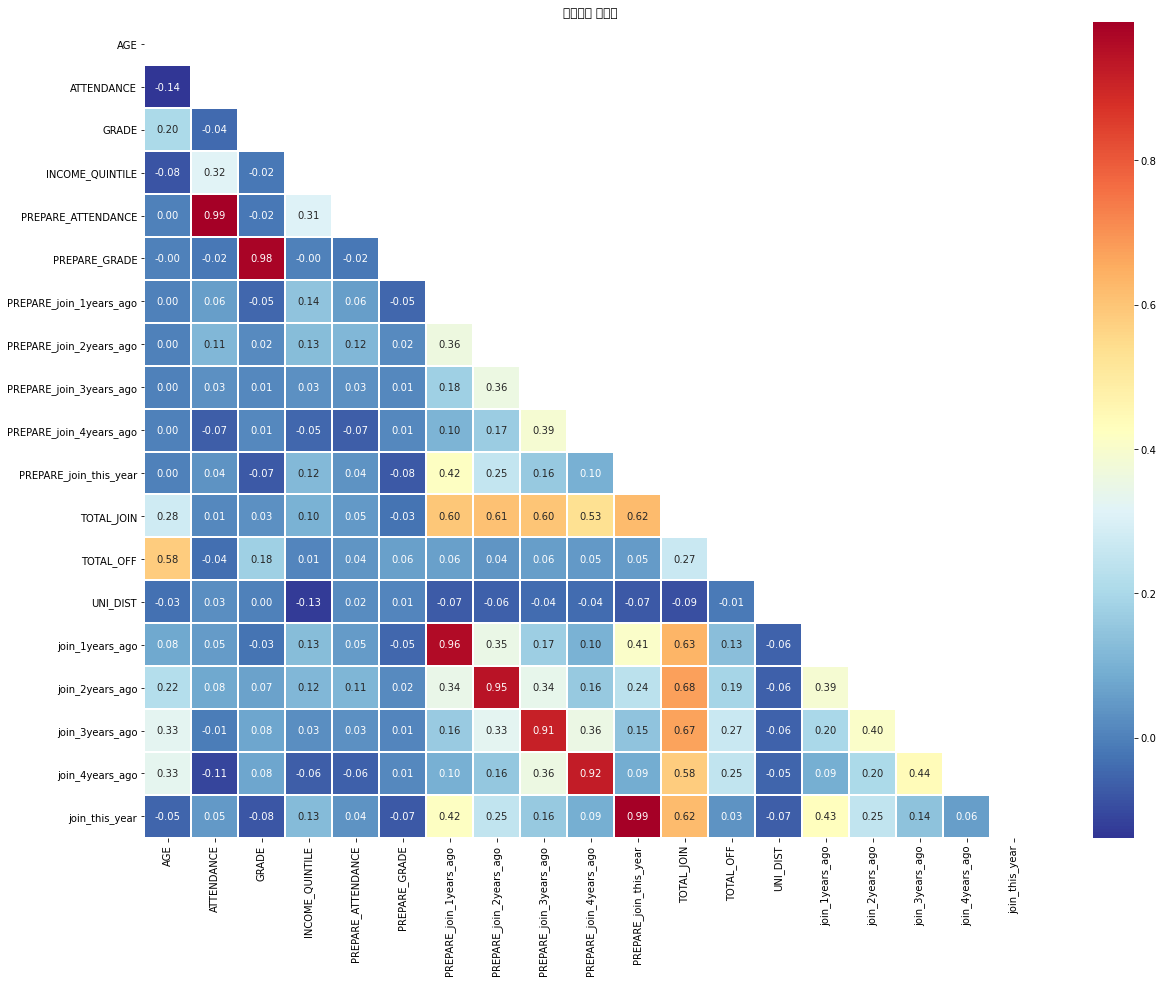

In [6]:
### 필요한 모듈 불러오기
#%matplotlib inline	# 시각화 결과를 Jupyter Notebook에서 바로 보기
# import matplotlib.pyplot as plt    # 모듈 불러오기

### 상관계수 테이블
corr = copy_student.corr()    # 'df'라는 데이터셋을 'corr'라는 이름의 상관계수 테이블로 저장 

### 상관계수 히트맵 그리기

# 히트맵 사이즈 설정
plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

#### 데이터가 정규분포를 이루는지 확인하기
 - 최소 최대 정규화: 모든 feature들의 스케일이 동일하지만, 이상치(outlier)를 잘 처리하지 못한다. (X - MIN) / (MAX-MIN) 
 - Z-점수 정규화(표준화) : 이상치(outlier)를 잘 처리하지만, 정확히 동일한 척도로 정규화 된 데이터를 생성하지는 않는다. (X - 평균) / 표준편차

In [7]:
plot_target = int_col(copy_student)

['AGE', 'ATTENDANCE', 'GRADE', 'INCOME_QUINTILE', 'PREPARE_ATTENDANCE', 'PREPARE_GRADE', 'PREPARE_join_1years_ago', 'PREPARE_join_2years_ago', 'PREPARE_join_3years_ago', 'PREPARE_join_4years_ago', 'PREPARE_join_this_year', 'TOTAL_JOIN', 'TOTAL_OFF', 'UNI_DIST', 'join_1years_ago', 'join_2years_ago', 'join_3years_ago', 'join_4years_ago', 'join_this_year']


AGE 의 가우시안 분포 확인


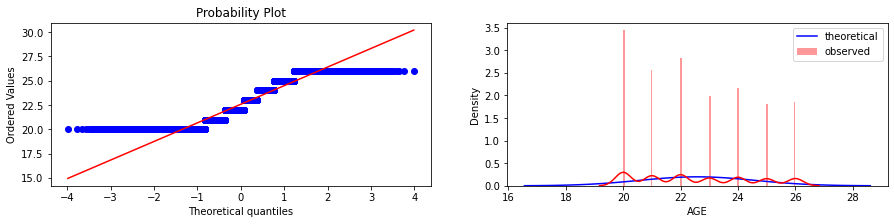


ATTENDANCE 의 가우시안 분포 확인


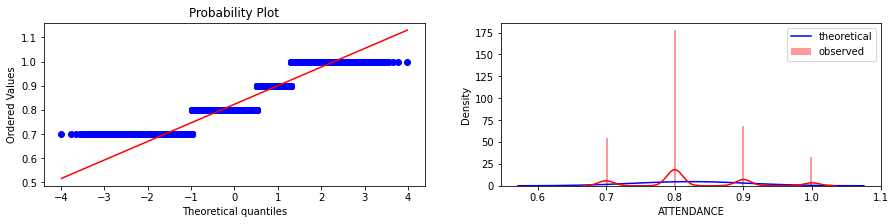


GRADE 의 가우시안 분포 확인


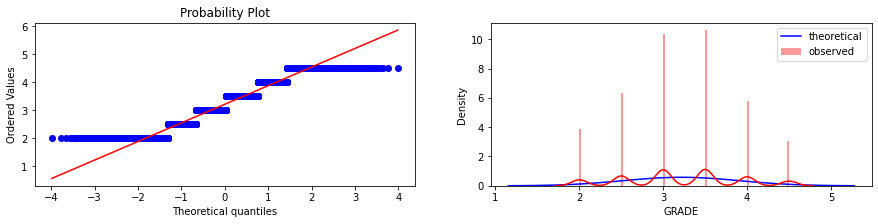


INCOME_QUINTILE 의 가우시안 분포 확인


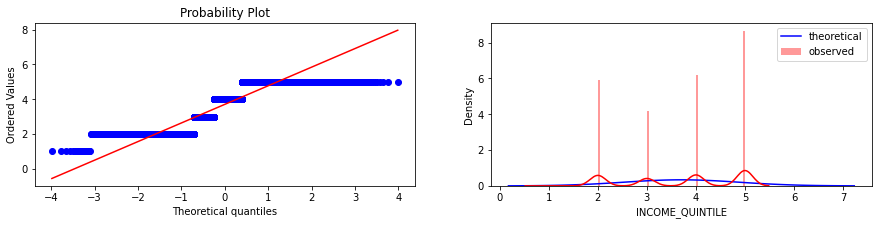


PREPARE_ATTENDANCE 의 가우시안 분포 확인


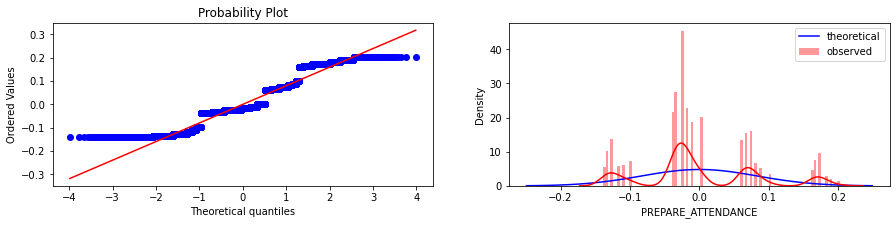


PREPARE_GRADE 의 가우시안 분포 확인


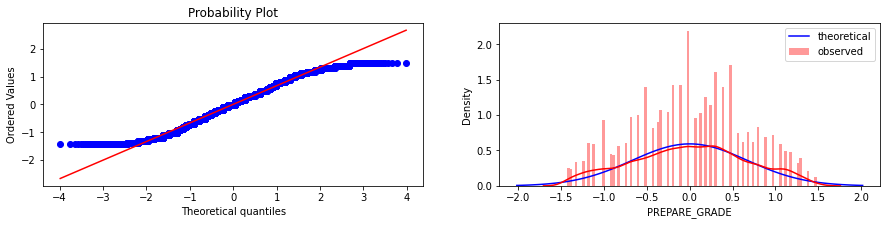


PREPARE_join_1years_ago 의 가우시안 분포 확인


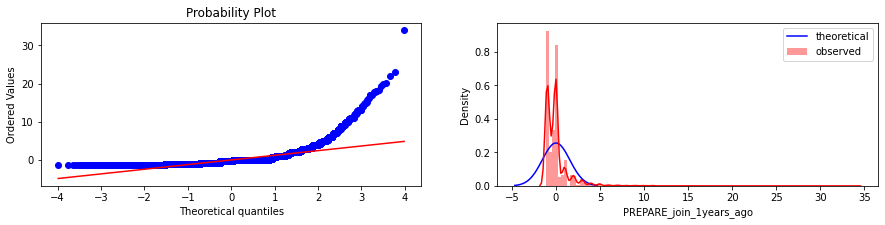


PREPARE_join_2years_ago 의 가우시안 분포 확인


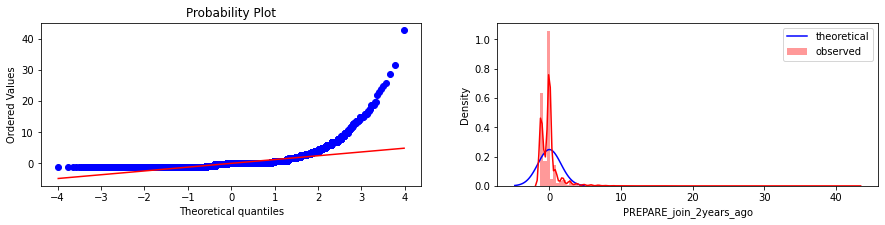


PREPARE_join_3years_ago 의 가우시안 분포 확인


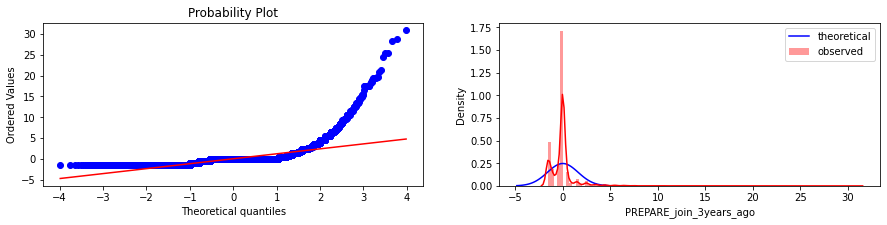


PREPARE_join_4years_ago 의 가우시안 분포 확인


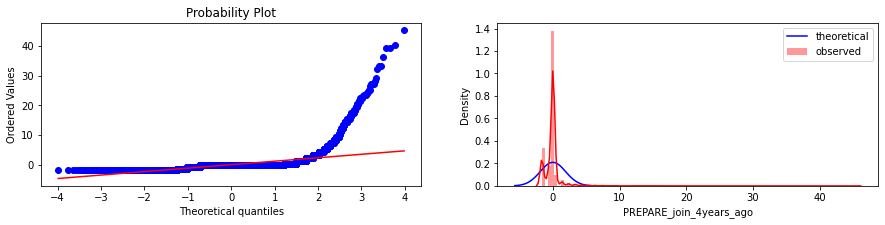


PREPARE_join_this_year 의 가우시안 분포 확인


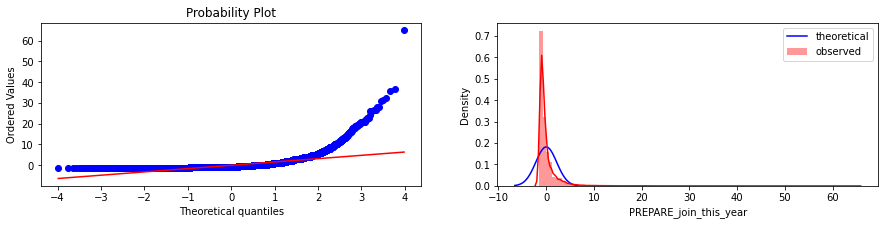


TOTAL_JOIN 의 가우시안 분포 확인


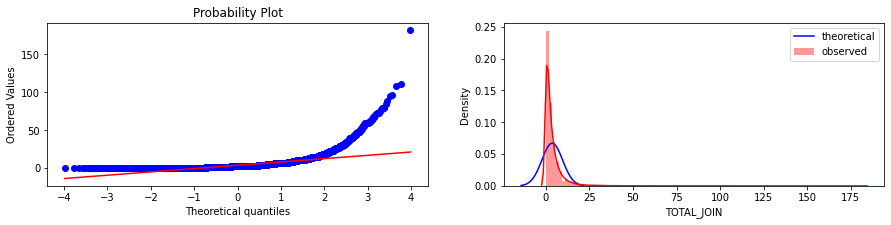


TOTAL_OFF 의 가우시안 분포 확인


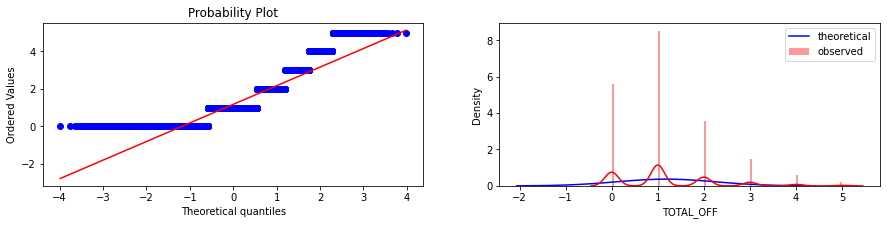


UNI_DIST 의 가우시안 분포 확인


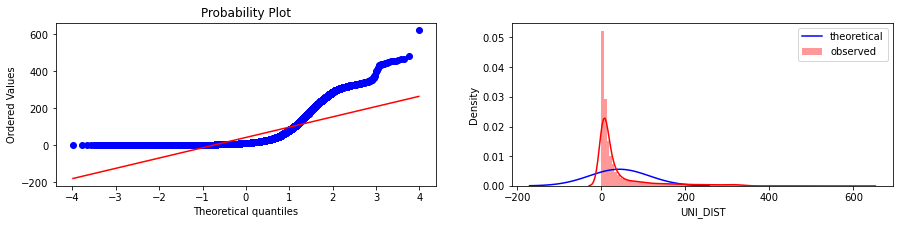


join_1years_ago 의 가우시안 분포 확인


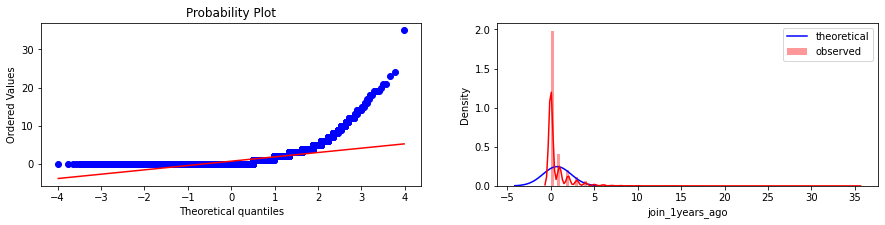


join_2years_ago 의 가우시안 분포 확인


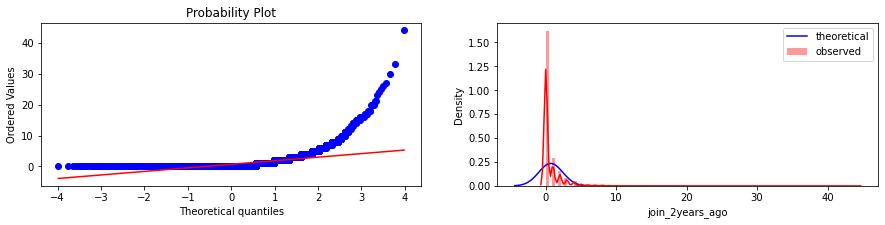


join_3years_ago 의 가우시안 분포 확인


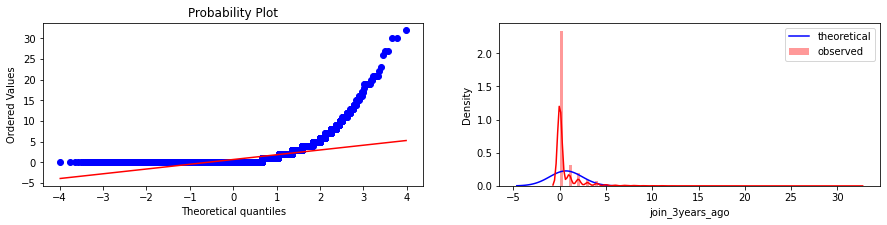


join_4years_ago 의 가우시안 분포 확인


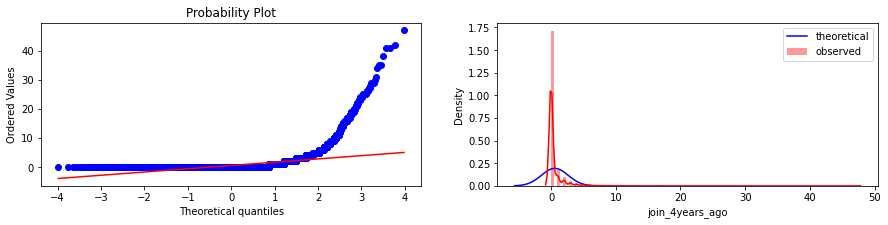


join_this_year 의 가우시안 분포 확인


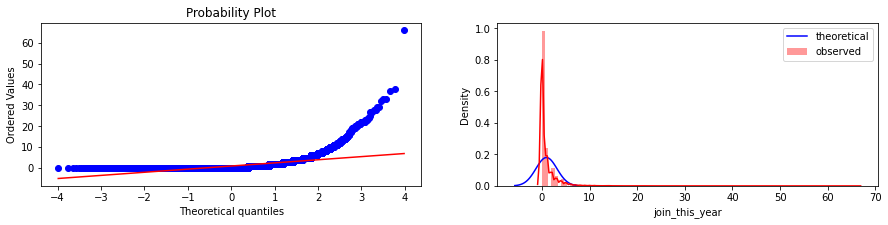

In [8]:
import scipy.stats as stats

for i in plot_target:
    print(i,"의 가우시안 분포 확인")
    fig = plt.figure(figsize=(15,3))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    stats.probplot(copy_student[i], dist=stats.norm,plot=ax1)

    mu = copy_student[i].mean()
    variance = copy_student[i].var()
    sigma = variance ** 0.5
    x=np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x,mu,sigma), color="blue",label="theoretical")

    sns.distplot(ax=ax2, a=copy_student[i], bins=100, color="red", label="observed")
    ax2.legend()
    plt.show()
    print()

#### stats.kstest으로 가설검증하기
 - 귀무가설은 '정규분포를 따른다' 이다.

In [9]:
for i in plot_target:
    print(i,"귀무가설의 기각 여부 확인")
    test_state, p_val = stats.kstest(copy_student[i],'norm',args=(copy_student[i].mean(), copy_student[i].var()**0.5) )
    print("Test-statistics : {:.5f}, p-value : {:.5f}".format(test_state, p_val))
    print()

AGE 귀무가설의 기각 여부 확인
Test-statistics : 0.14532, p-value : 0.00000

ATTENDANCE 귀무가설의 기각 여부 확인
Test-statistics : 0.30745, p-value : 0.00000

GRADE 귀무가설의 기각 여부 확인
Test-statistics : 0.14655, p-value : 0.00000

INCOME_QUINTILE 귀무가설의 기각 여부 확인
Test-statistics : 0.21193, p-value : 0.00000

PREPARE_ATTENDANCE 귀무가설의 기각 여부 확인
Test-statistics : 0.18707, p-value : 0.00000

PREPARE_GRADE 귀무가설의 기각 여부 확인
Test-statistics : 0.03919, p-value : 0.00000

PREPARE_join_1years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.28419, p-value : 0.00000

PREPARE_join_2years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.31942, p-value : 0.00000

PREPARE_join_3years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.35189, p-value : 0.00000

PREPARE_join_4years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.38858, p-value : 0.00000

PREPARE_join_this_year 귀무가설의 기각 여부 확인
Test-statistics : 0.25956, p-value : 0.00000

TOTAL_JOIN 귀무가설의 기각 여부 확인
Test-statistics : 0.27197, p-value : 0.00000

TOTAL_OFF 귀무가설의 기각 여부 확인
Test-statistics : 0.27245, p-value : 0.0000

##### 모든 데이터가 정규분포를 따르지 않으므로 MinMaxScaler를 이용해 정규화를 진행

In [10]:
from sklearn.preprocessing import MinMaxScaler

int_data = copy_student[plot_target]

# 인덱스 빼두기 
index = int_data.index

# MinMaxcaler 객체 생성
scaler = MinMaxScaler()

# MinMaxcaler로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(int_data)

data_scaled = scaler.transform(int_data)

# XAI를 위해 정규화 되지 않은 데이터를 저장
inverse_data = pd.DataFrame(data=scaler.inverse_transform(data_scaled), columns=int_data.columns, index=index)

inverse_data.to_csv('./temp_data/save_inverse_data.csv',index = True)
# int_data.loc[:,:] = data_scaled

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
data_scaled = pd.DataFrame(data=data_scaled, columns=int_data.columns, index=index)

print('feature 들의 정규화 최소 값')
print(data_scaled.min())
print('\nfeature 들의 정규화 최대 값')
print(data_scaled.max())

feature 들의 정규화 최소 값
AGE                        0.0
ATTENDANCE                 0.0
GRADE                      0.0
INCOME_QUINTILE            0.0
PREPARE_ATTENDANCE         0.0
PREPARE_GRADE              0.0
PREPARE_join_1years_ago    0.0
PREPARE_join_2years_ago    0.0
PREPARE_join_3years_ago    0.0
PREPARE_join_4years_ago    0.0
PREPARE_join_this_year     0.0
TOTAL_JOIN                 0.0
TOTAL_OFF                  0.0
UNI_DIST                   0.0
join_1years_ago            0.0
join_2years_ago            0.0
join_3years_ago            0.0
join_4years_ago            0.0
join_this_year             0.0
dtype: float64

feature 들의 정규화 최대 값
AGE                        1.0
ATTENDANCE                 1.0
GRADE                      1.0
INCOME_QUINTILE            1.0
PREPARE_ATTENDANCE         1.0
PREPARE_GRADE              1.0
PREPARE_join_1years_ago    1.0
PREPARE_join_2years_ago    1.0
PREPARE_join_3years_ago    1.0
PREPARE_join_4years_ago    1.0
PREPARE_join_this_year     1.0
TOTAL_JOIN    

##### label컬럼을 제외한 나머지 카테고리 데이터들은 원핫 인코딩을 진행

In [11]:
onehot_target = str_col(copy_student)

onehot_target.remove('ACADEMIC_STAT_CODE')

str_data = copy_student[onehot_target]

onehot_data = pd.get_dummies(str_data)

['ACADEMIC_STAT_CODE', 'ADMISSION', 'DOUBLE_MAJOR', 'OCCP_GRP_1', 'off_1years_ago', 'off_2years_ago', 'off_3years_ago', 'off_4years_ago', 'off_this_year']


#### 인코딩과 스케일링 데이터, 라벨을 합쳐서 저장

In [12]:
concat_data = pd.concat([data_scaled,onehot_data,copy_student['ACADEMIC_STAT_CODE']], axis=1)

concat_data.to_csv('./temp_data/save_scaled_student.csv',index = True)